In [1]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=CAD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [3]:
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)

In [4]:
hist.head(5)

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2020-08-06,16166.96,15658.52,15845.59,199.10,3161764.40,15903.65
2020-08-07,16112.00,15385.69,15903.65,202.95,3207979.78,15691.92
2020-08-08,16032.77,15623.27,15691.92,142.30,2252912.82,15963.75
2020-08-09,16044.57,15640.49,15963.75,115.97,1834735.37,15833.66
2020-08-10,16304.90,15691.20,15833.66,138.78,2216531.45,15855.85


In [5]:
hist.corr()['close'].sort_values(ascending=False)

close         1.000000
high          0.998108
low           0.997356
open          0.995500
volumeto      0.375568
volumefrom    0.244955
Name: close, dtype: float64

In [6]:
X = hist.drop(['close'],axis=1)
Y = hist['close']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [9]:
#Training the Algorithm
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [10]:
test_data_prediction = regressor.predict(X_test)

# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9968952019795259


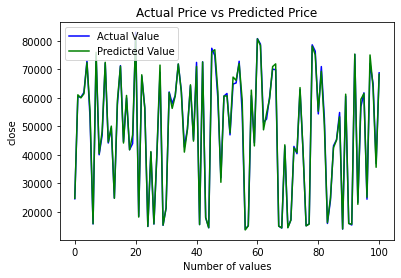

In [11]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('close')

plt.legend()
plt.show()


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [14]:
predictions=lm.predict(X_test)

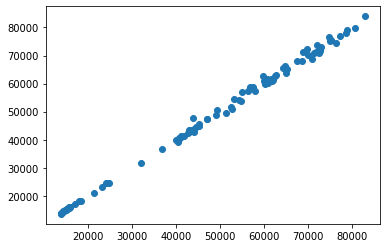

In [15]:
plt.scatter(Y_test,predictions)

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(Y_test,predictions)
print('r2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(Y_test,predictions))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(Y_test,predictions)))

r2 socre is 0.9979107433377874
mean_sqrd_error is== 937498.2363595495
root_mean_squared error of is== 968.2449258114134


In [18]:
import xgboost as xgb

In [21]:
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, Y_train)

[16:59:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [22]:
Test_data_prediction = xgb_regressor.predict(X_test)
# R squared error
Error_score = metrics.r2_score(Y_test, Test_data_prediction)
print("R squared error : ", Error_score)

R squared error :  0.9967616232586385


In [23]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
x = sm.add_constant(X_train)
ols = sm.OLS(Y_train, x)
est = ols.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.630e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:07:02   Log-Likelihood:                -3279.2
No. Observations:                 400   AIC:                             6570.
Df Residuals:                     394   BIC:                             6594.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.0171    116.853      0.548      0.5